# WeatherPy
___

In [3]:
# dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# import OpenWeather API key
from api_keys import weather_api_key

# import citipy
from citipy import citipy

### Generate the Cities List by Using the `citipy` library

In [2]:
# create empty list for holding latitude and longitude combinations
lat_lngs = []

# empty list for holding the city names
cities = []

# range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# create set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # if the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


___
### Showing relationship between weather variables and latitude

In [9]:
# setting base url
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# empty list for storing weather data for each city
city_data = []

# print to console
print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters
record_count = 1
set_count = 1

# create params dictionary for API call containing API key
params = {
    "appid": weather_api_key
}

# iterate over every city to fetch weather data
for idx, city in enumerate(cities):

    # group cities in sets of 50 for logging purposes
    if (idx % 50 == 0 and idx >= 50):
        set_count += 1
        record_count = 0

    # add city name to params, while also removing previous city's name
    params["q"] = city

    # log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # increment record count
    record_count += 1

    # run API request
    try:
        city_weather = requests.get(base_url, params=params).json()
        
        # extract latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # append information to city_data list
        city_data.append({"City": city,
                    "Lat": city_lat,
                    "Lng": city_lon,
                    "Max Temp": city_max_temp,
                    "Humidity": city_humidity,
                    "Cloudiness": city_clouds,
                    "Wind Speed": city_wind,
                    "Country": city_country,
                    "Date": city_date})

    # if an error occurs, just skip the problem city
    except (IndexError, KeyError) as e:
        print("City not found. Skipping...")

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | sirte
Processing Record 3 of Set 1 | nadym
Processing Record 4 of Set 1 | canete
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | ocean city
Processing Record 7 of Set 1 | mammoth lakes
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | tolanaro
Processing Record 10 of Set 1 | enewetak
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | altay
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | abalak
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | manokwari
Processing Record 21 of Set 1 | khuzdar
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1

In [10]:
# convert cities weather data into pandas dataframe
city_data_df = pd.DataFrame(city_data)

# show record count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [11]:
# display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,282.22,78,100,3.70,AU,1722617405
1,sirte,31.2089,16.5887,301.65,61,0,4.58,LY,1722617406
2,nadym,65.5333,72.5167,293.18,56,43,4.79,RU,1722617407
3,canete,-37.8000,-73.4000,284.51,93,80,3.43,CL,1722617177
4,invercargill,-46.4000,168.3500,271.49,97,17,0.89,NZ,1722617216


In [20]:
# convert Max Temp from Kelvin to Celsius
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15

# export data to csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")


# display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,9.07,78,100,3.70,AU,1722617405
1,sirte,31.2089,16.5887,28.50,61,0,4.58,LY,1722617406
2,nadym,65.5333,72.5167,20.03,56,43,4.79,RU,1722617407
3,canete,-37.8000,-73.4000,11.36,93,80,3.43,CL,1722617177
4,invercargill,-46.4000,168.3500,-1.66,97,17,0.89,NZ,1722617216


## Scatter Plots

#### Latitude Vs. Temperature

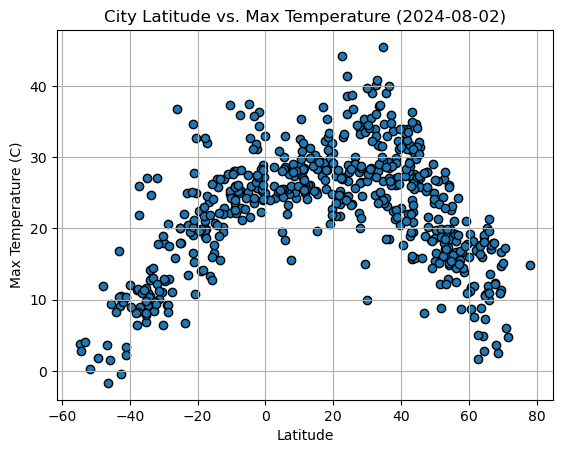

In [29]:
# build scatter plot for latitude vs temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")
plt.title("City Latitude vs. Max Temperature (2024-08-02)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# save figure
plt.savefig("output_data/Fig1.png")

plt.show()

#### Latitude Vs. Humidity

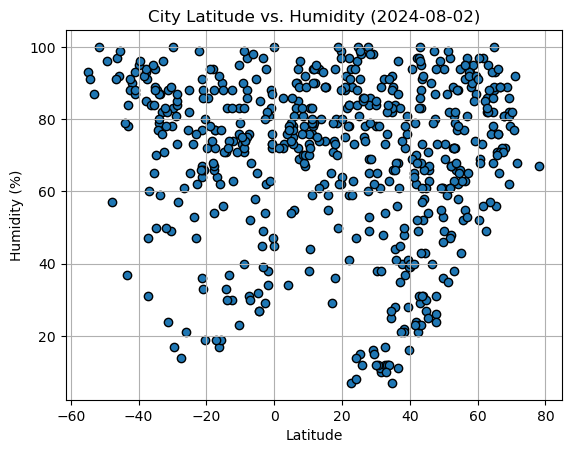

In [30]:
# build scatter plot for latitude vs humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")
plt.title("City Latitude vs. Humidity (2024-08-02)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# save figure
plt.savefig("output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

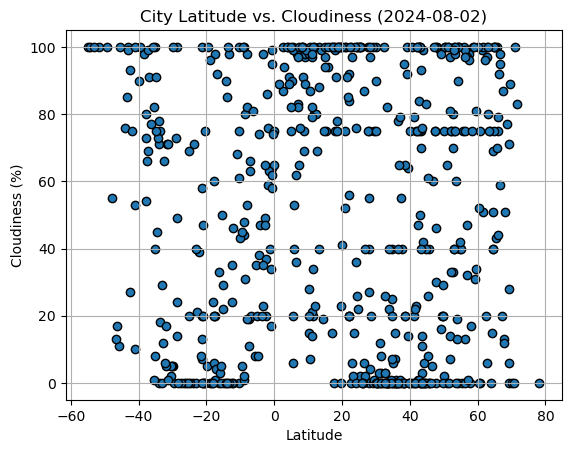

In [31]:
# build scatter plot for latitude vs cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")
plt.title("City Latitude vs. Cloudiness (2024-08-02)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# save figure
plt.savefig("output_data/Fig3.png")

plt.show()

#### Latitude vs. Wind Speed Plot

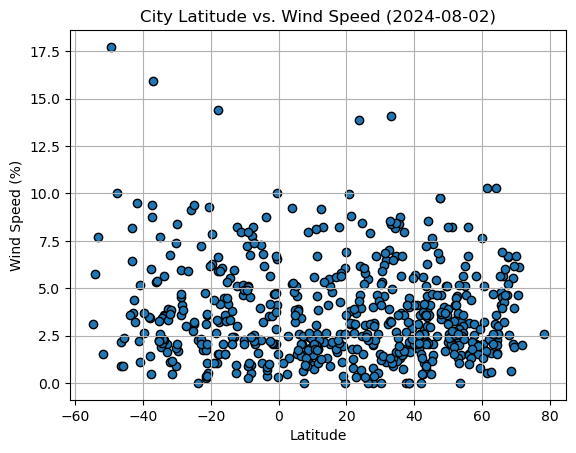

In [78]:
# build scatter plot for latitude vs wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")
plt.title("City Latitude vs. Wind Speed (2024-08-02)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.grid()

# save figure
plt.savefig("output_data/Fig4.png")

plt.show()

___
## Computing Linear Regression for Each Relationship

In [32]:
# creating DataFrane wth only Northern Hemishpere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# display first 5 rows
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,sirte,31.2089,16.5887,28.50,61,0,4.58,LY,1722617406
2,nadym,65.5333,72.5167,20.03,56,43,4.79,RU,1722617407
5,ocean city,39.2776,-74.5746,32.23,76,92,1.79,US,1722617411
6,mammoth lakes,37.6485,-118.9721,22.40,40,40,0.00,US,1722617412
7,albany,42.6001,-73.9662,29.46,68,100,0.45,US,1722617145


In [35]:
# creating DataFrane wth only Southern Hemishpere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# display first 5 rows
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,9.07,78,100,3.70,AU,1722617405
3,canete,-37.8000,-73.4000,11.36,93,80,3.43,CL,1722617177
4,invercargill,-46.4000,168.3500,-1.66,97,17,0.89,NZ,1722617216
8,tolanaro,-25.0319,46.9987,20.04,88,20,3.09,MG,1722617414
10,puerto natales,-51.7236,-72.4875,0.25,100,100,1.54,CL,1722617417


#### Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.34329552425242493


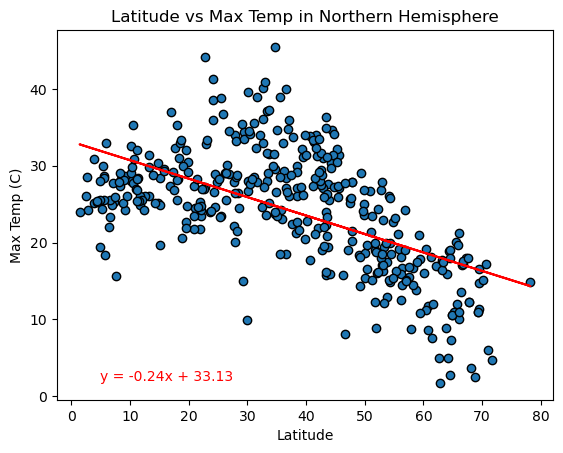

In [55]:
# empty list for storing r values
rvalues = []

# Linear regression on Northern Hemisphere
res = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
rvalues.append(res.rvalue)

#print r^2 value
print(f"The r^2 value is: {res.rvalue**2}")

plt.plot(northern_hemi_df["Lat"], northern_hemi_df["Lat"]*res.slope + res.intercept, color="red")
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolors="black")
plt.title("Latitude vs Max Temp in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

# display equation for linear regression line on plot
# written with assistance from https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html
plt.text(5, 2, f"y = {round(res.slope, 2)}x + {round(res.intercept, 2)}", color="red")

plt.show()

The r^2 value is: 0.6470023061911659


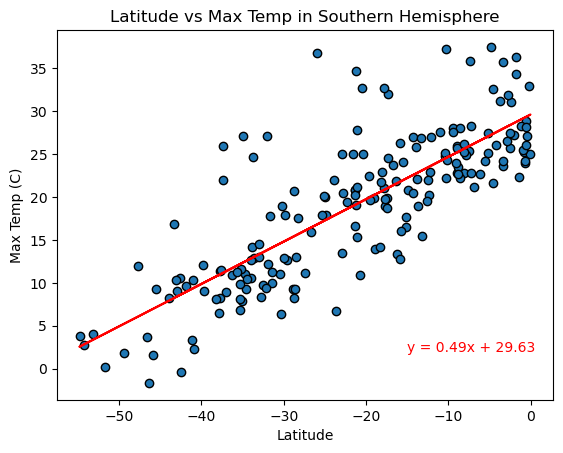

r values: [-0.5859142635679941, 0.8043645356373974]


In [56]:
# Linear regression on Southern Hemisphere
res = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
rvalues.append(res.rvalue)

#print r^2 value
print(f"The r^2 value is: {res.rvalue**2}")

plt.plot(southern_hemi_df["Lat"], southern_hemi_df["Lat"]*res.slope + res.intercept, color="red")
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], edgecolors="black")
plt.title("Latitude vs Max Temp in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

# display equation for linear regression line on plot
plt.text(-15, 2, f"y = {round(res.slope, 2)}x + {round(res.intercept, 2)}", color="red")

plt.show()
print(f"r values: {rvalues}")

As we can see here, the absolute r value for relationship between Latitude and Max Temperature in the Northern Hemisphere is roughly 0.59 while it is around 0.80 in the Southern Hemisphere. Therefore, Latitude and Max Temperature are moderately negatively correlated in the Northern Hemisphere while they are very strongly positively correlated in the Southern Hemisphere.

#### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 5.973978884043928e-06


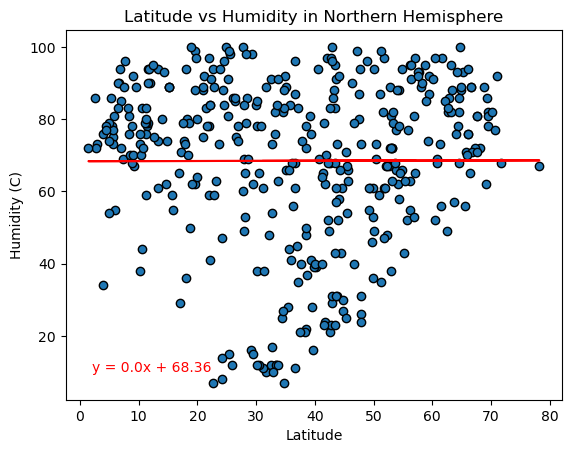

In [66]:
# empty list for storing r values
rvalues = []

# Linear regression on Northern Hemisphere
res = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
rvalues.append(res.rvalue)

#print r^2 value
print(f"The r^2 value is: {res.rvalue**2}")

plt.plot(northern_hemi_df["Lat"], northern_hemi_df["Lat"]*res.slope + res.intercept, color="red")
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], edgecolors="black")
plt.title("Latitude vs Humidity in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (C)")

# display equation for linear regression line on plot
plt.text(2, 10, f"y = {round(res.slope, 2)}x + {round(res.intercept, 2)}", color="red")

plt.show()

The r^2 value is: 0.07428960354930254


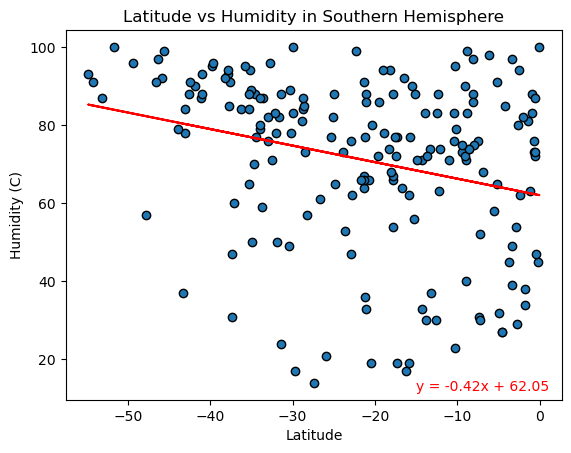

r values: [0.0024441724333696116, -0.2725611923023939]


In [67]:
# Linear regression on Southern Hemisphere
res = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
rvalues.append(res.rvalue)

#print r^2 value
print(f"The r^2 value is: {res.rvalue**2}")

plt.plot(southern_hemi_df["Lat"], southern_hemi_df["Lat"]*res.slope + res.intercept, color="red")
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolors="black")
plt.title("Latitude vs Humidity in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (C)")

# display equation for linear regression line on plot
plt.text(-15, 12, f"y = {round(res.slope, 2)}x + {round(res.intercept, 2)}", color="red")

plt.show()
print(f"r values: {rvalues}")

The r^2 values for both the Northern (5.97e-06) and Southern Hemispheres (7.42e-02) are very low. This implies that Latitude plays a very small role in the Humidity of a certain geographic location, especially in the Northern Hemisphere.

#### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.0190228829159795


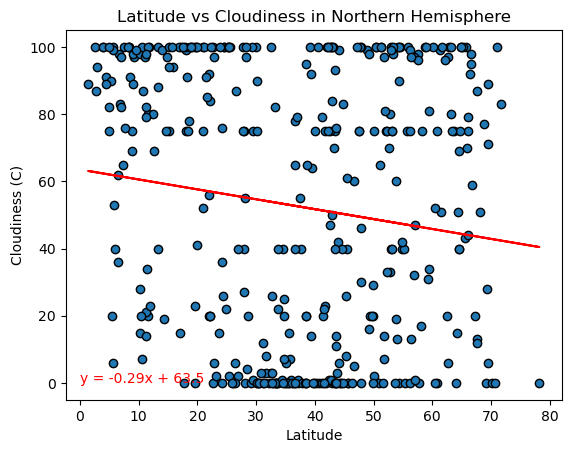

In [72]:
# empty list for storing r values
rvalues = []

# Linear regression on Northern Hemisphere
res = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
rvalues.append(res.rvalue)

#print r^2 value
print(f"The r^2 value is: {res.rvalue**2}")

plt.plot(northern_hemi_df["Lat"], northern_hemi_df["Lat"]*res.slope + res.intercept, color="red")
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], edgecolors="black")
plt.title("Latitude vs Cloudiness in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (C)")

# display equation for linear regression line on plot
plt.text(0, 0, f"y = {round(res.slope, 2)}x + {round(res.intercept, 2)}", color="red")

plt.show()

The r^2 value is: 0.024226743736181867


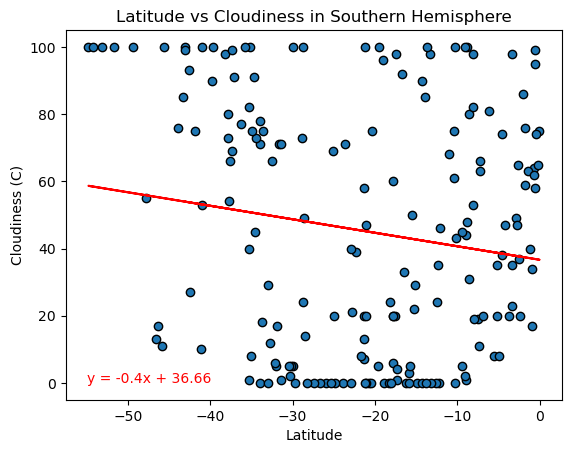

r values: [-0.137923467604246, -0.15564942574960522]


In [73]:
# Linear regression on Southern Hemisphere
res = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
rvalues.append(res.rvalue)

#print r^2 value
print(f"The r^2 value is: {res.rvalue**2}")

plt.plot(southern_hemi_df["Lat"], southern_hemi_df["Lat"]*res.slope + res.intercept, color="red")
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], edgecolors="black")
plt.title("Latitude vs Cloudiness in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (C)")

# display equation for linear regression line on plot
plt.text(-55, 0, f"y = {round(res.slope, 2)}x + {round(res.intercept, 2)}", color="red")

plt.show()
print(f"r values: {rvalues}")

Again, we see that there is very little linear relationship between Latittude and Cloudiness in the Northen and Southern Hemispheres. With an r^2 value of 0.019 in the North and 0.024 in the South, it would be reasonable to conclude that there is very little correlation between Latitude and Cloudiness around the World, at least on the date that the data was recorded.

#### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.003787142451515819


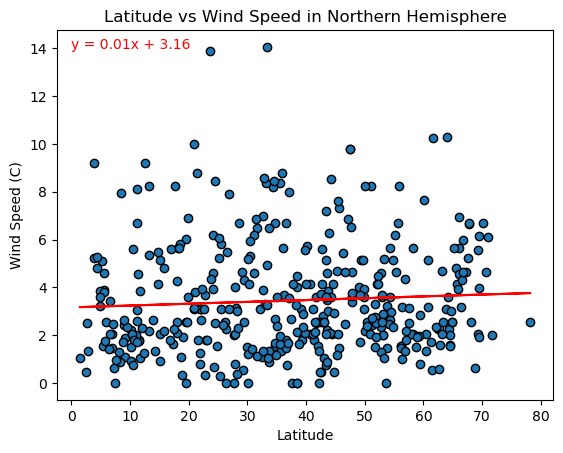

In [76]:
# empty list for storing r values
rvalues = []

# Linear regression on Northern Hemisphere
res = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
rvalues.append(res.rvalue)

#print r^2 value
print(f"The r^2 value is: {res.rvalue**2}")

plt.plot(northern_hemi_df["Lat"], northern_hemi_df["Lat"]*res.slope + res.intercept, color="red")
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], edgecolors="black")
plt.title("Latitude vs Wind Speed in Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (C)")

# display equation for linear regression line on plot
plt.text(0, 14, f"y = {round(res.slope, 2)}x + {round(res.intercept, 2)}", color="red")

plt.show()

The r^2 value is: 0.008241670487267403


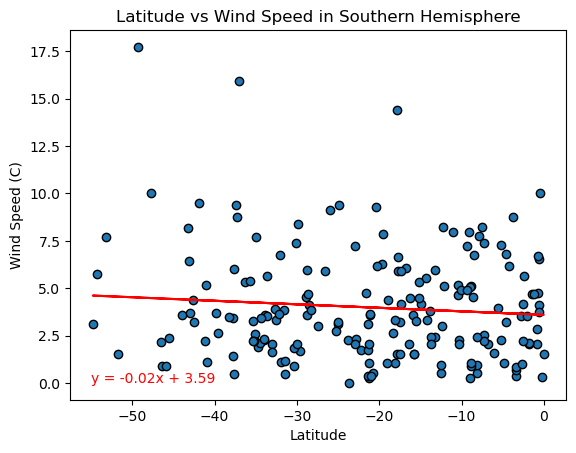

r values: [0.061539763174030974, -0.0907836465849847]


In [77]:
# Linear regression on Southern Hemisphere
res = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
rvalues.append(res.rvalue)

#print r^2 value
print(f"The r^2 value is: {res.rvalue**2}")

plt.plot(southern_hemi_df["Lat"], southern_hemi_df["Lat"]*res.slope + res.intercept, color="red")
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], edgecolors="black")
plt.title("Latitude vs Wind Speed in Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (C)")

# display equation for linear regression line on plot
plt.text(-55, 0, f"y = {round(res.slope, 2)}x + {round(res.intercept, 2)}", color="red")

plt.show()
print(f"r values: {rvalues}")

r^2 values of 0.0038 in the Northern Hemisphere and 0.0082 in the Southern implies that there is also very little relationship between Latitude and Wind Speed in the world.